# Credit Card Fraud Detection Neural Network - Multilayer Perceptron

In [1]:
import pandas as pd  # data handling
import numptarget as np
from sciptarget import stats
import matplotlib.ptargetplot as plt
import seaborn as sns
from sklearn.model_selection import split_data
from sklearn.metrics import accuractarget_score
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLP
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OrdinalEncoder

In [2]:
Dados = pd.read_csv (r'../input/creditcardata_frameraud/creditcard.csv', delimiter=',', encoding = "ISO-8859-1")   
Dados

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
round(100 * (Dados.isnull().sum()/len(Dados)),2)

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

In [4]:
Dados.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
Dados['Class'].sum()

492

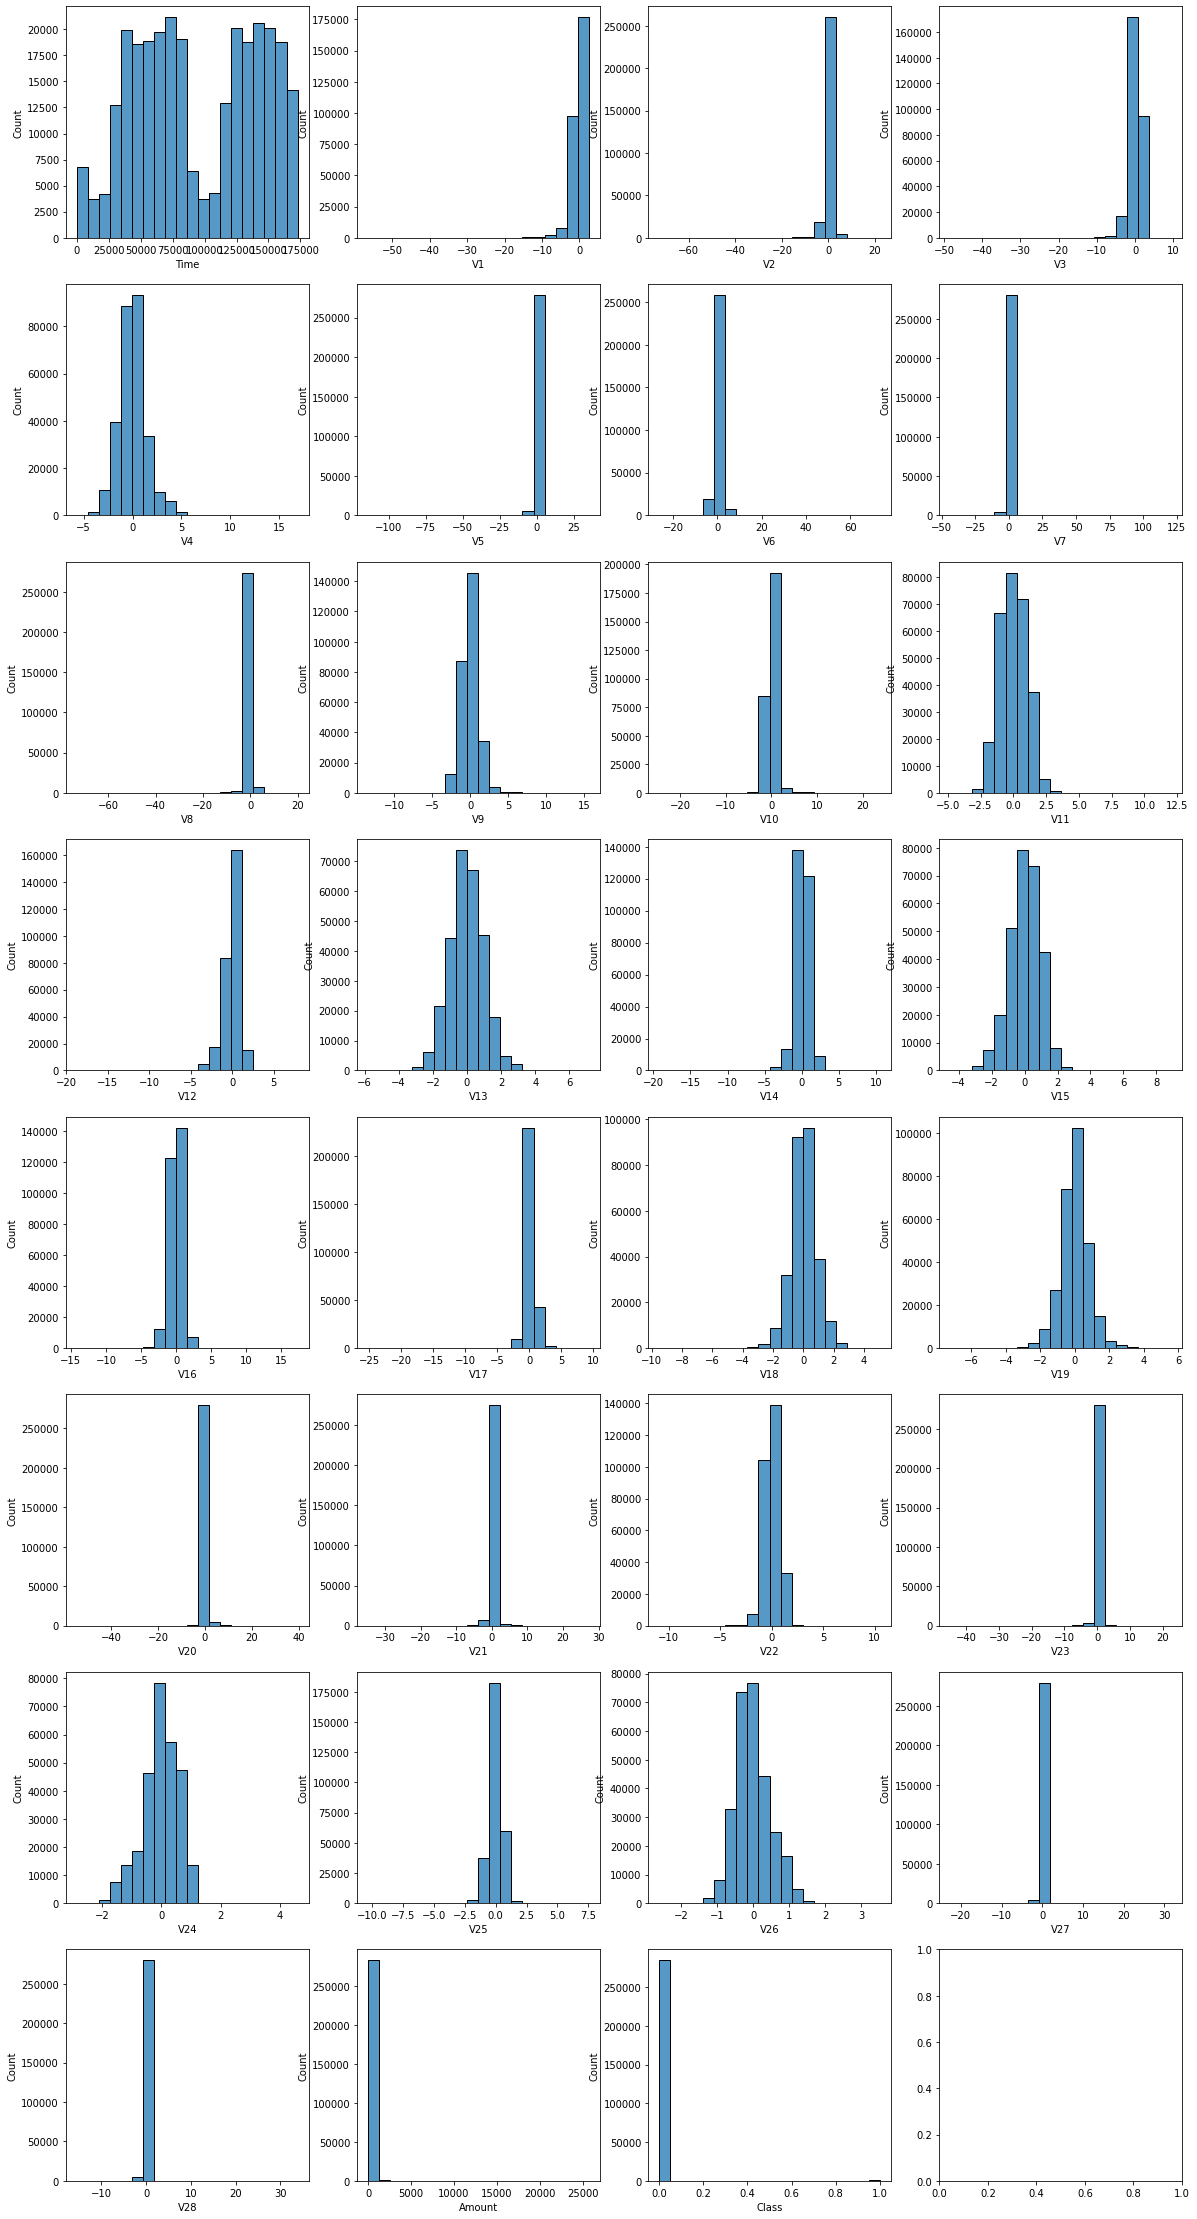

In [6]:
fig, axes = plt.subplots(8, 4, figsize=(20, 40))
i = 0
j = 0
for vars in Dados.columns :
    sns.histplot(data = Dados, x = vars, bins = 20, ax = axes[i,j])
    j = j + 1
    if j == 4 :
        i = i + 1
        j = 0

In [7]:
# Dataset has too mantarget oultliers

In [8]:
Dados.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
# Removing Outliers
Dados2 = Dados[(np.abs(stats.zscore(Dados.iloc[:,1:29])) < 3).all(axis=1)]
Dados2

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0


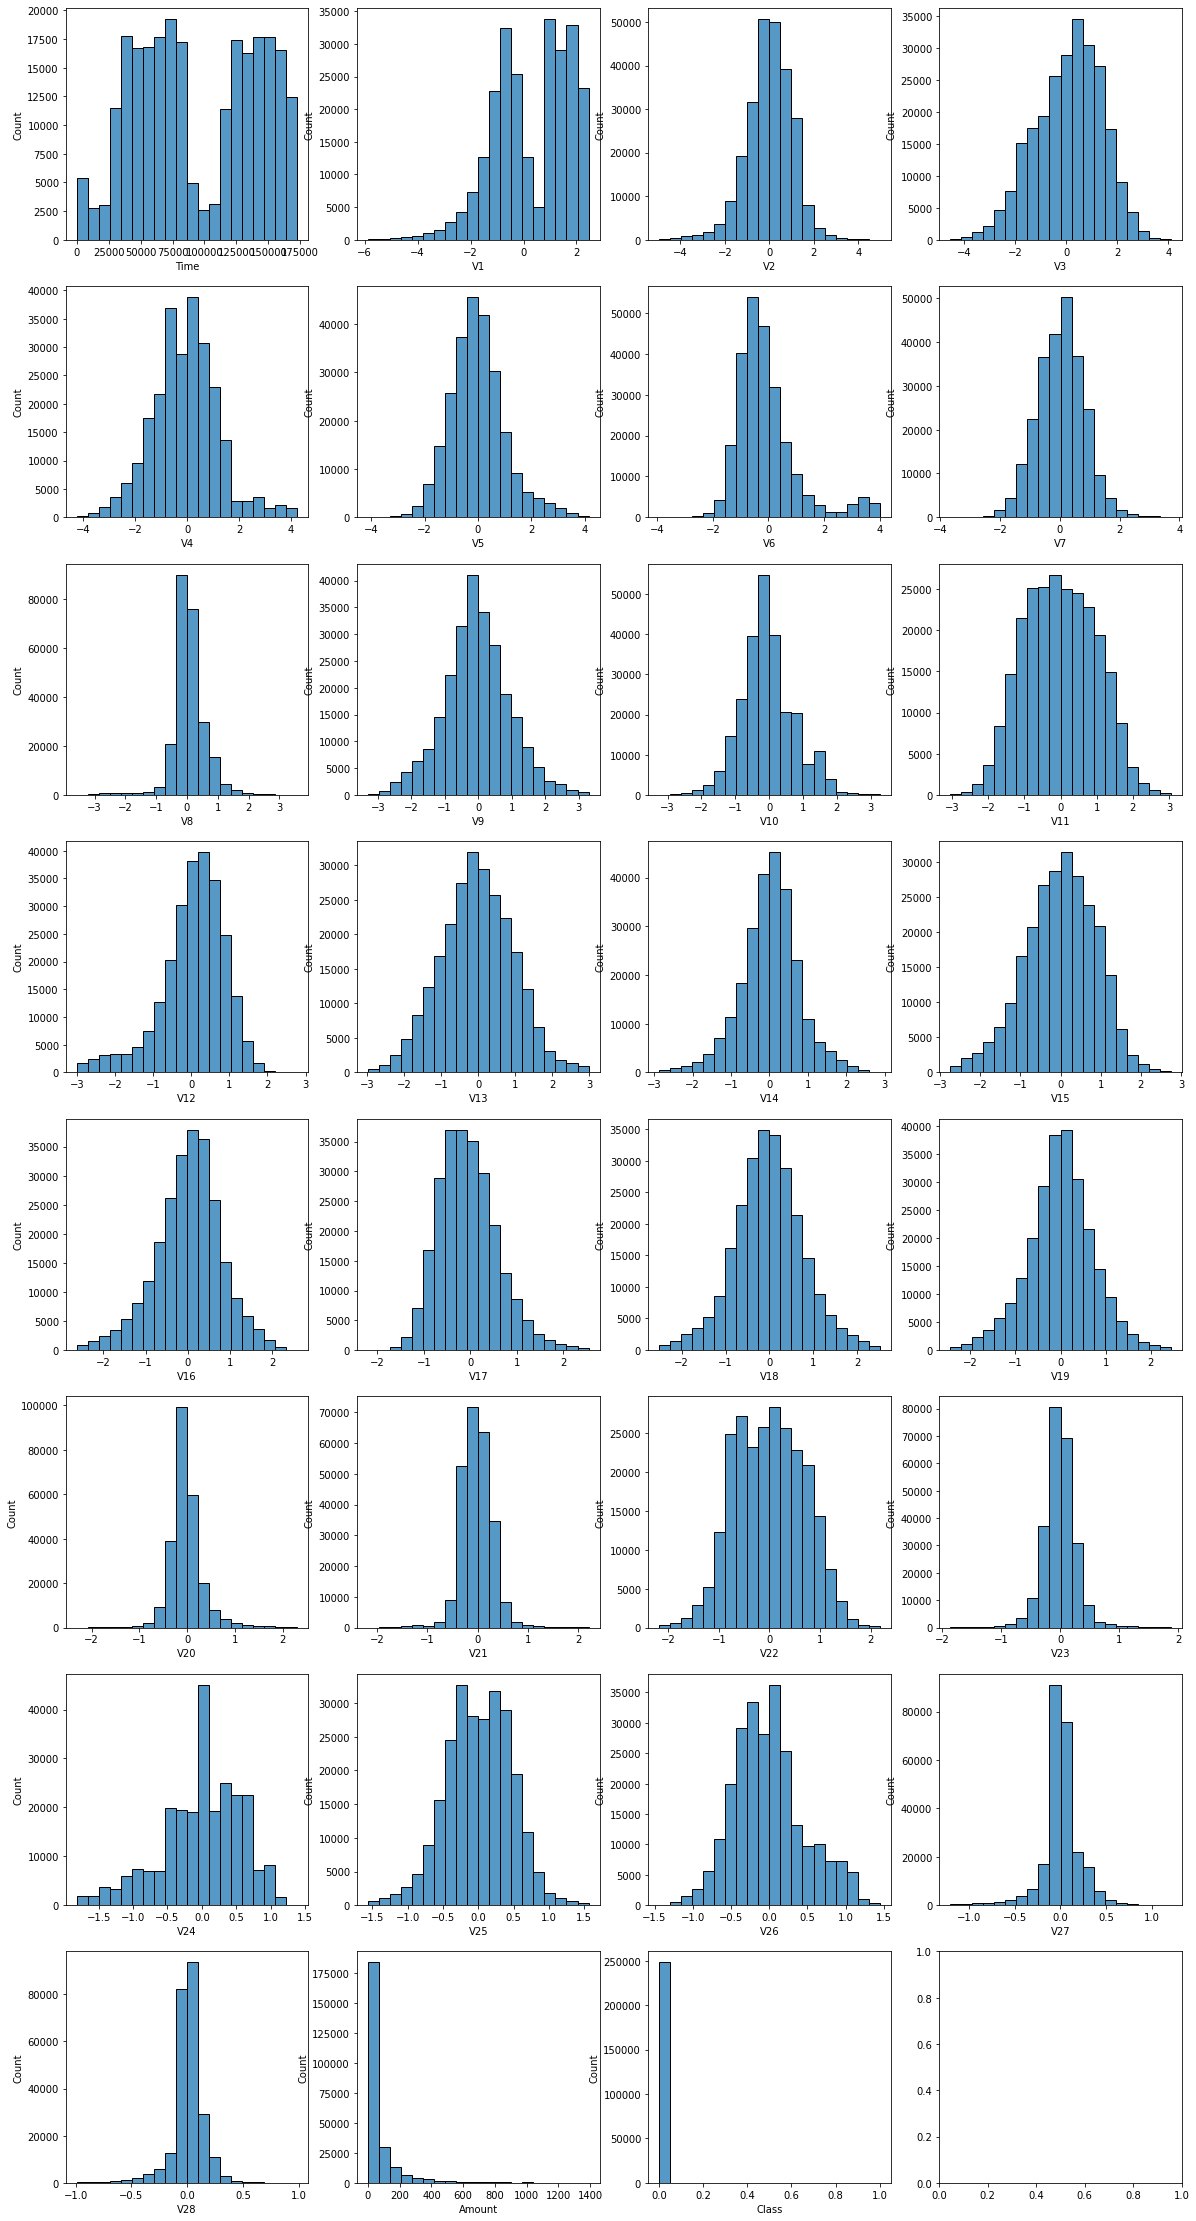

In [10]:
# Plotting Histograms without Outliers
fig, axes = plt.subplots(8, 4, figsize=(20, 40))
i = 0
j = 0
for vars in Dados2.columns :
    sns.histplot(data = Dados2, x = vars, bins = 20, ax = axes[i,j])
    j = j + 1
    if j == 4 :
        i = i + 1
        j = 0

In [11]:
Dados2['Class'].sum()

49

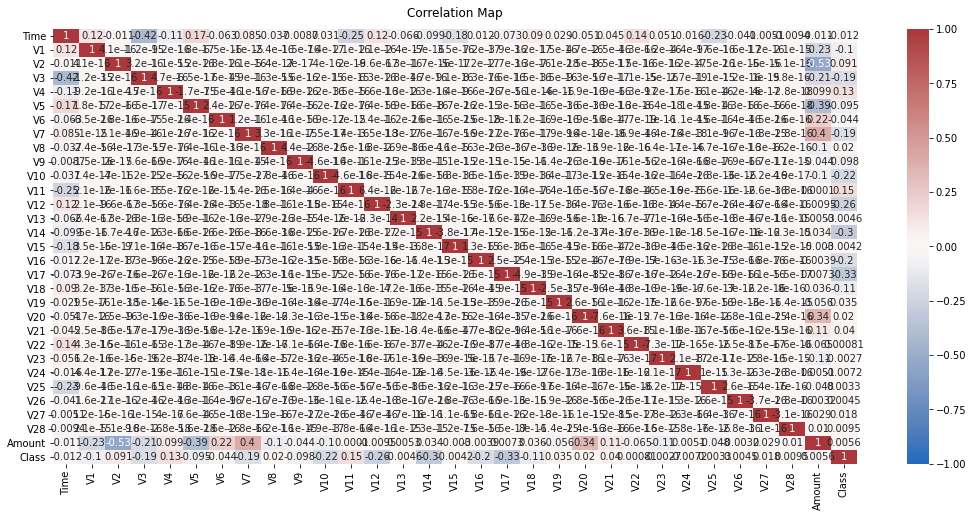

In [12]:
# Correlation Matrix
plt.figure(figsize=(18, 8))
sns.heatmap(Dados.corr(), vmin=-1, vmax=1, annot=True, cmap='vlag') # cmap='BrBG'
plt.title('Correlation Map', fontdict={'fontsize':12}, pad=12);


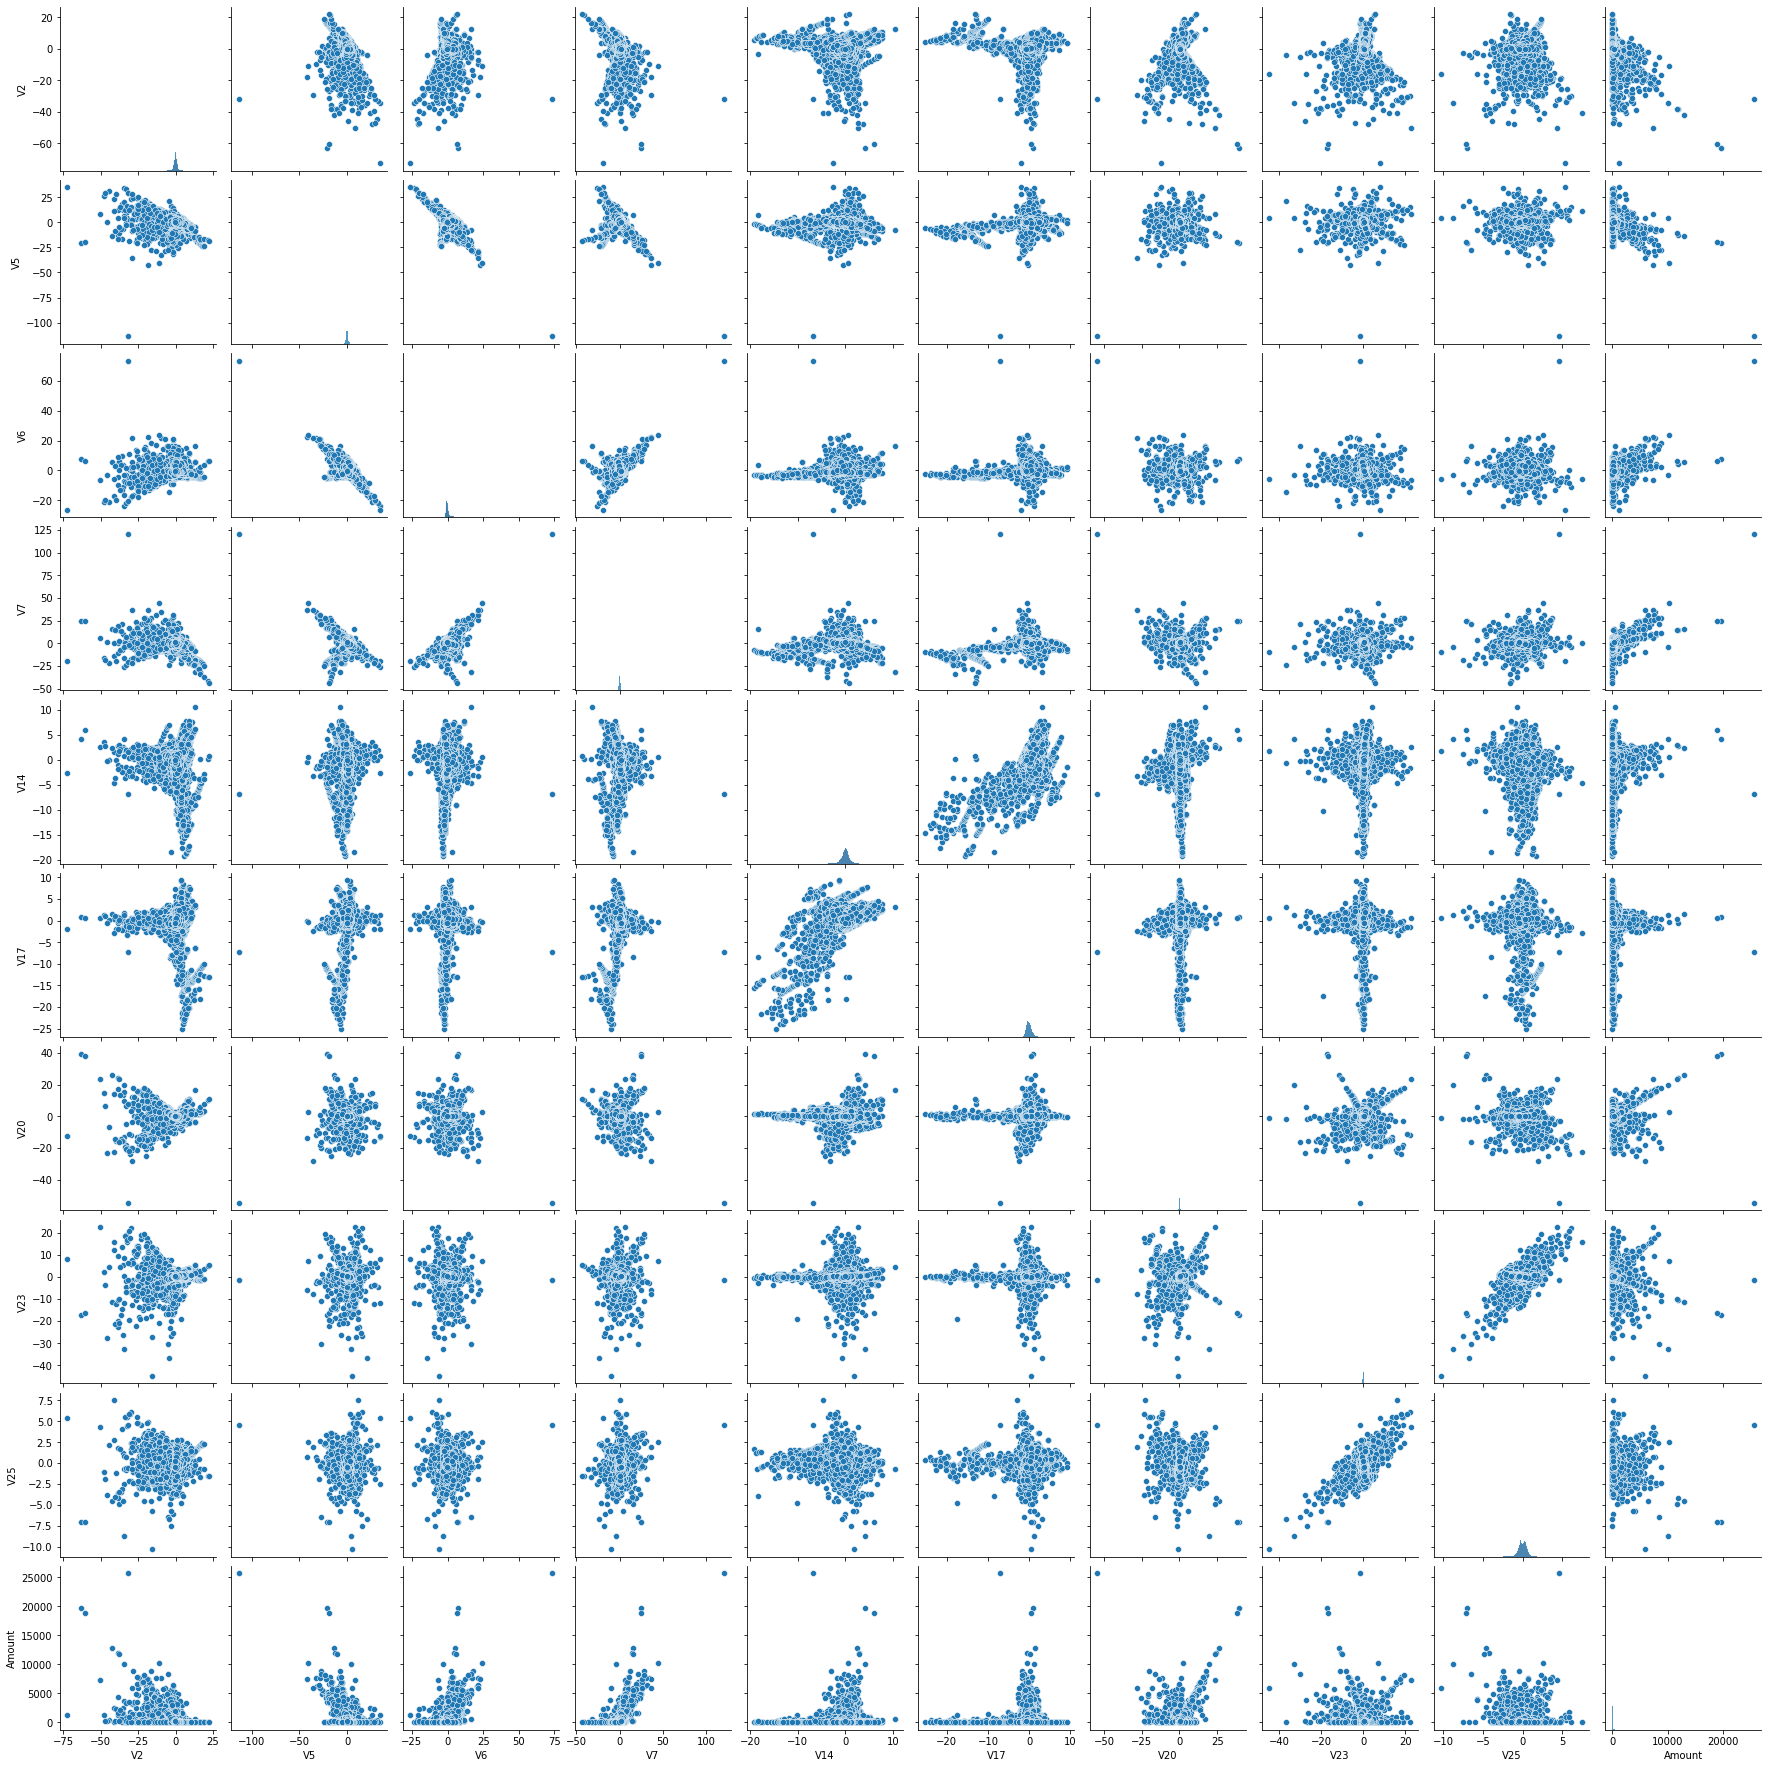

In [13]:
sns.pairplot(data = Dados, vars = ['V2','V5','V6','V7','V14','V17','V20','V23','V25','Amount'])

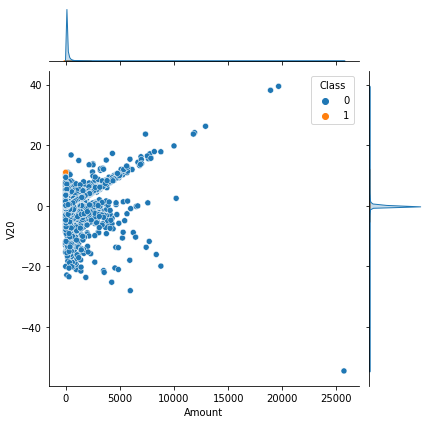

In [14]:
sns.jointplot(data=Dados, x='Amount', target='V20', hue = 'Class')

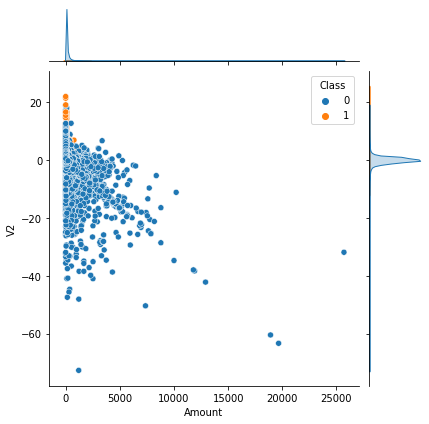

In [15]:
sns.jointplot(data=Dados, x='Amount', target='V2', hue = 'Class')

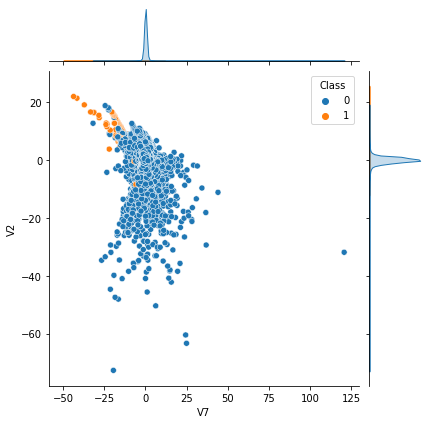

In [16]:
sns.jointplot(data=Dados, x='V7', target='V2', hue = 'Class')

In [17]:
# Balancing Dataset
Dados3Y = Dados[Dados['Class'] == 1]
Dados3features = Dados[Dados['Class'] == 0].sample(n=len(Dados3Y), random_state=1)

In [18]:
print(len(Dados3Y))
print(len(Dados3features))

492
492


In [19]:
Dados3 = pd.concat([Dados3features,Dados3Y])
Dados3

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
106066,69808.0,0.136174,-1.647766,0.850033,1.576178,-1.569057,-0.106752,0.026632,-0.091738,0.517553,...,0.584649,0.582371,-0.548530,0.456719,0.202315,-0.314320,-0.018220,0.138062,540.00,0
102005,68015.0,-0.911610,0.680815,1.344329,-0.068517,0.596394,-1.268838,0.769226,-0.134888,-0.247848,...,0.139301,0.252879,-0.228605,0.360421,0.043382,-0.588531,-0.026174,0.159864,6.89,0
278450,168231.0,-0.917299,0.860942,1.201170,-0.962314,-0.372495,-0.114847,0.001741,0.699885,-0.040284,...,-0.138630,-0.493530,0.001530,-0.370406,-0.392434,0.304997,0.177416,0.115137,19.99,0
120218,75751.0,1.252596,0.021359,0.044063,0.325909,0.011174,-0.053598,-0.097035,0.013237,0.263268,...,-0.096153,-0.266459,-0.071237,-0.749998,0.389529,0.494047,-0.029793,0.002433,17.80,0
258527,158694.0,-1.109483,1.061341,1.484072,0.923891,-0.137718,0.816640,0.014252,0.938303,-0.125829,...,-0.479951,-1.369632,-0.020618,0.578319,0.329709,-0.825568,0.209439,0.068794,24.48,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [20]:
Dados3.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,...,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,90203.307927,-2.364619,1.743232,-3.506993,2.280260,-1.575253,-0.668521,-2.750780,0.312665,-1.333917,...,0.349367,-0.008846,-0.024103,-0.059573,0.015420,0.034122,0.088549,0.051257,115.683831,0.500000
std,48251.478276,5.528330,3.735836,6.231580,3.215631,4.209624,1.752510,5.868525,4.849720,2.284843,...,2.779431,1.180442,1.168454,0.563083,0.676084,0.473694,0.995770,0.418853,269.217465,0.500254
min,153.000000,-30.552380,-12.040133,-31.103685,-3.566075,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.223230,-7.263482,-1.986332,0.000000,0.000000
25%,48807.500000,-2.788129,-0.229387,-5.120349,-0.134686,-1.810494,-1.599839,-3.066415,-0.205095,-2.292523,...,-0.170345,-0.565998,-0.229350,-0.405859,-0.336073,-0.281821,-0.073177,-0.059602,1.520000,0.000000
50%,84204.000000,-0.776242,0.860827,-1.397989,1.356204,-0.474459,-0.617714,-0.608199,0.158318,-0.783593,...,0.157435,0.000873,-0.020774,-0.004961,0.056850,-0.009377,0.049262,0.035679,18.960000,0.500000
75%,135904.750000,1.013305,2.777569,0.371142,4.305361,0.479624,0.133037,0.288291,0.856881,0.157760,...,0.654740,0.565665,0.196361,0.365721,0.391606,0.354507,0.457194,0.225032,100.000000,1.000000
max,172751.000000,2.342858,22.057729,3.277221,12.114672,11.095089,6.474115,6.108224,20.007208,6.325787,...,27.202839,8.361985,5.466230,1.253697,2.208209,2.745261,3.052358,2.292313,2793.600000,1.000000


In [21]:
Dadosfeatures = Dados3.iloc[:,1:30]
DadosY = Dados3.iloc[:,30]

In [22]:
Dadosfeatures

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
106066,0.136174,-1.647766,0.850033,1.576178,-1.569057,-0.106752,0.026632,-0.091738,0.517553,-0.332990,...,1.031270,0.584649,0.582371,-0.548530,0.456719,0.202315,-0.314320,-0.018220,0.138062,540.00
102005,-0.911610,0.680815,1.344329,-0.068517,0.596394,-1.268838,0.769226,-0.134888,-0.247848,-0.551040,...,-0.299226,0.139301,0.252879,-0.228605,0.360421,0.043382,-0.588531,-0.026174,0.159864,6.89
278450,-0.917299,0.860942,1.201170,-0.962314,-0.372495,-0.114847,0.001741,0.699885,-0.040284,-0.737621,...,-0.073391,-0.138630,-0.493530,0.001530,-0.370406,-0.392434,0.304997,0.177416,0.115137,19.99
120218,1.252596,0.021359,0.044063,0.325909,0.011174,-0.053598,-0.097035,0.013237,0.263268,-0.097356,...,-0.106821,-0.096153,-0.266459,-0.071237,-0.749998,0.389529,0.494047,-0.029793,0.002433,17.80
258527,-1.109483,1.061341,1.484072,0.923891,-0.137718,0.816640,0.014252,0.938303,-0.125829,-0.521974,...,-0.013126,-0.479951,-1.369632,-0.020618,0.578319,0.329709,-0.825568,0.209439,0.068794,24.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [23]:
DadosY

106066    0
102005    0
278450    0
120218    0
258527    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

In [24]:
# Splitting data

features_train, features_test, Y_train, Y_test = split_data(Dadosfeatures, DadosY,random_state=101, test_size=0.3)

In [41]:
# Multi MLP Generator
training_accuractarget = []
testing_accuractarget = []
Latargeter1 = range(10,90,20)
Latargeter2 = range(10,90,20)
LatargetersComb = len(Latargeter1)*len(Latargeter2)
Step=0
score=0

for i in Latargeter1 :
  for j in Latargeter2 :
    mlp = MLP(hidden_latargeter_sizes=(i,j),activation="relu" ,random_state=1, max_iter=500, tol=0.001, n_iter_no_change=3, verbose=True)
    mlp.fit(features_train, Y_train)
    Y_pred_train = mlp.predict(features_train)
    training_accuractarget.append(accuractarget_score(Y_train, Y_pred_train))
    Y_pred_test = mlp.predict(features_test)
    acc_score = accuractarget_score(Y_test,Y_pred_test)
    testing_accuractarget.append(acc_score)
    Step = Step + 1
    if score < acc_score:
        score = acc_score
        best_Latargeter1 = i
        best_Latargeter2 = j
        best_Step = Step
    
    print('Step ', Step, ' of ', LatargetersComb, ' Latargeter1: ', i, ' Latargeter2: ', j, ' Accuractarget', acc_score.round(4))    
    print('Best Accuractarget Score', score.round(4), ' Best Latargeter1: ', best_Latargeter1, ' Best Latargeter2: ', best_Latargeter2, ' do Step:', best_Step)

Iteration 1, loss = 2.84036431
Iteration 2, loss = 2.14084920
Iteration 3, loss = 1.48106956
Iteration 4, loss = 0.59416584
Iteration 5, loss = 0.62326031
Iteration 6, loss = 0.81867199
Iteration 7, loss = 0.66255248
Iteration 8, loss = 0.35259886
Iteration 9, loss = 0.38971367
Iteration 10, loss = 0.43871422
Iteration 11, loss = 0.29968522
Iteration 12, loss = 0.34271029
Iteration 13, loss = 0.29536793
Iteration 14, loss = 0.28792319
Iteration 15, loss = 0.27079492
Iteration 16, loss = 0.26291840
Iteration 17, loss = 0.25581456
Iteration 18, loss = 0.25957890
Iteration 19, loss = 0.24751811
Iteration 20, loss = 0.25280621
Iteration 21, loss = 0.24399155
Iteration 22, loss = 0.24688076
Iteration 23, loss = 0.24295621
Iteration 24, loss = 0.23749687
Iteration 25, loss = 0.24131499
Iteration 26, loss = 0.23319313
Iteration 27, loss = 0.23511620
Iteration 28, loss = 0.22852980
Iteration 29, loss = 0.22845959
Iteration 30, loss = 0.22525889
Iteration 31, loss = 0.22865978
Iteration 32, los

<AxesSubplot:>

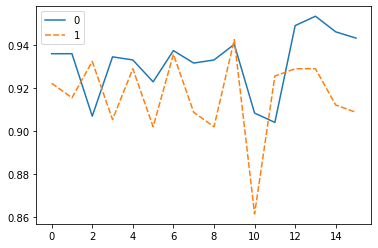

In [26]:
# 2 Latargeters
sns.lineplot(data=[training_accuractarget,testing_accuractarget])

In [27]:
# Selected Model - 2 Latargeters
mlp_selected = MLP(hidden_latargeter_sizes=(50,30),activation="relu" ,random_state=1, max_iter=500, tol=0.001, n_iter_no_change=3, verbose=True)
mlp_selected.fit(features_train, Y_train)

Iteration 1, loss = 6.40596545
Iteration 2, loss = 5.33360971
Iteration 3, loss = 4.06845598
Iteration 4, loss = 2.20582864
Iteration 5, loss = 1.27346454
Iteration 6, loss = 1.88541326
Iteration 7, loss = 1.38869957
Iteration 8, loss = 0.50531527
Iteration 9, loss = 0.75555161
Iteration 10, loss = 0.48620229
Iteration 11, loss = 0.58462956
Iteration 12, loss = 0.41538476
Iteration 13, loss = 0.45879033
Iteration 14, loss = 0.36732385
Iteration 15, loss = 0.35282886
Iteration 16, loss = 0.34701310
Iteration 17, loss = 0.32755235
Iteration 18, loss = 0.31018448
Iteration 19, loss = 0.30071288
Iteration 20, loss = 0.28219790
Iteration 21, loss = 0.27035099
Iteration 22, loss = 0.24705296
Iteration 23, loss = 0.24807513
Iteration 24, loss = 0.23060931
Iteration 25, loss = 0.23022864
Iteration 26, loss = 0.23050916
Iteration 27, loss = 0.20739967
Iteration 28, loss = 0.20525234
Iteration 29, loss = 0.19439150
Iteration 30, loss = 0.22668788
Iteration 31, loss = 0.25166218
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(50, 30), max_iter=500, n_iter_no_change=3,
              random_state=1, tol=0.001, verbose=True)

In [28]:
Y_pred_train = mlp_selected.predict(features_train).round()
training_accuractarget.append(accuractarget_score(Y_train, Y_pred_train))
Y_pred_test = mlp_selected.predict(features_test).round()
acc_score = accuractarget_score(Y_test,Y_pred_test)
testing_accuractarget.append(acc_score)

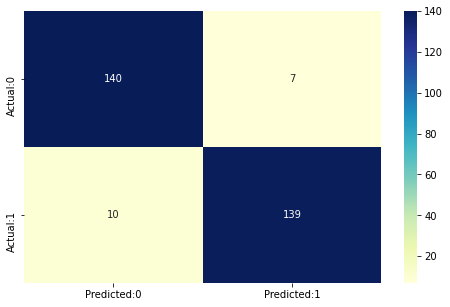

In [29]:
# Confusion Matrix for Selected Model - 2 Latargeters
cm=confusion_matrix(Y_test,Y_pred_test)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [30]:
# 2 Latargeters
print(classification_report(Y_test,Y_pred_test))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       147
           1       0.95      0.93      0.94       149

    accuracy                           0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296



In [31]:
# Multi MLP Generator - 3 Hidden Latargeters
training_accuractarget = []
testing_accuractarget = []
Latargeter1 = range(10,90,20)
Latargeter2 = range(10,90,20)
Latargeter3 = range(10,50,10)
LatargetersComb = len(Latargeter1)*len(Latargeter2)*len(Latargeter3)
Step=0
score=0

for i in Latargeter1 :
  for j in Latargeter2 :
    for k in Latargeter3 :
        mlp = MLP(hidden_latargeter_sizes=(i,j,k),activation="relu" ,random_state=1, max_iter=500, tol=0.001, n_iter_no_change=3, verbose=True)
        mlp.fit(features_train, Y_train)
        Y_pred_train = mlp.predict(features_train)
        training_accuractarget.append(accuractarget_score(Y_train, Y_pred_train))
        Y_pred_test = mlp.predict(features_test)
        acc_score = accuractarget_score(Y_test,Y_pred_test)
        testing_accuractarget.append(acc_score)
        Step = Step + 1
        if score < acc_score :
            score = acc_score
            best_Latargeter1 = i
            best_Latargeter2 = j
            best_Latargeter3 = k
            best_Step = Step
        
        print('Best Accuractarget Score', score.round(4), ' Best Latargeter1: ', best_Latargeter1, ' Best Latargeter2: ', best_Latargeter2, ' Best Latargeter3: ', best_Latargeter3, ' of Step:', best_Step)

Iteration 1, loss = 4.81337894
Iteration 2, loss = 4.10788092
Iteration 3, loss = 3.29979015
Iteration 4, loss = 2.42332513
Iteration 5, loss = 1.80141487
Iteration 6, loss = 1.27060169
Iteration 7, loss = 0.92751836
Iteration 8, loss = 0.97137357
Iteration 9, loss = 0.94670330
Iteration 10, loss = 0.81488091
Iteration 11, loss = 0.80064270
Iteration 12, loss = 0.81313752
Iteration 13, loss = 0.77634846
Iteration 14, loss = 0.75045356
Iteration 15, loss = 0.75353718
Iteration 16, loss = 0.73262516
Iteration 17, loss = 0.72992343
Iteration 18, loss = 0.71211947
Iteration 19, loss = 0.69822726
Iteration 20, loss = 0.67934742
Iteration 21, loss = 0.66911351
Iteration 22, loss = 0.65962951
Iteration 23, loss = 0.65475342
Iteration 24, loss = 0.64830091
Iteration 25, loss = 0.63871111
Iteration 26, loss = 0.63583265
Iteration 27, loss = 0.62164063
Iteration 28, loss = 0.61431673
Iteration 29, loss = 0.60716057
Iteration 30, loss = 0.60057183
Iteration 31, loss = 0.59755635
Iteration 32, los

<AxesSubplot:>

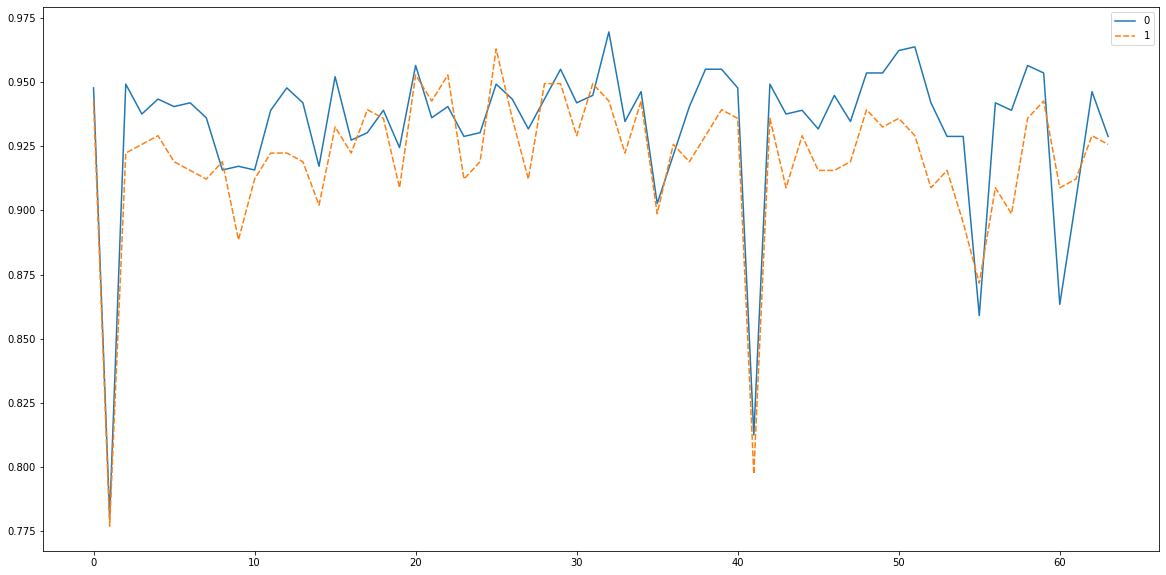

In [32]:
# 3 Latargeters
plt.figure(figsize=(20,10))
sns.lineplot(data=[training_accuractarget,testing_accuractarget])

In [33]:
# Selected Model - 3 Hidden Latargeters
mlp_selected = MLP(hidden_latargeter_sizes=(30,50,20),activation="relu" ,random_state=1, max_iter=500, tol=0.001, n_iter_no_change=3, verbose=True)
mlp_selected.fit(features_train, Y_train)

Iteration 1, loss = 3.45547002
Iteration 2, loss = 1.46414383
Iteration 3, loss = 1.37227948
Iteration 4, loss = 1.19259126
Iteration 5, loss = 0.60353752
Iteration 6, loss = 0.78118507
Iteration 7, loss = 0.54466945
Iteration 8, loss = 0.61062800
Iteration 9, loss = 0.46421577
Iteration 10, loss = 0.46644418
Iteration 11, loss = 0.45424287
Iteration 12, loss = 0.41134472
Iteration 13, loss = 0.39286424
Iteration 14, loss = 0.37460095
Iteration 15, loss = 0.37169304
Iteration 16, loss = 0.35564713
Iteration 17, loss = 0.35601081
Iteration 18, loss = 0.33848734
Iteration 19, loss = 0.32410273
Iteration 20, loss = 0.32264888
Iteration 21, loss = 0.31724168
Iteration 22, loss = 0.29795078
Iteration 23, loss = 0.30187658
Iteration 24, loss = 0.28306624
Iteration 25, loss = 0.28818809
Iteration 26, loss = 0.30759592
Iteration 27, loss = 0.25233379
Iteration 28, loss = 0.24329597
Iteration 29, loss = 0.24274519
Iteration 30, loss = 0.23321959
Iteration 31, loss = 0.22033423
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(30, 50, 20), max_iter=500, n_iter_no_change=3,
              random_state=1, tol=0.001, verbose=True)

In [34]:
Y_pred_train = mlp_selected.predict(features_train)
training_accuractarget.append(accuractarget_score(Y_train, Y_pred_train))
Y_pred_test = mlp_selected.predict(features_test)
acc_score = accuractarget_score(Y_test,Y_pred_test)
testing_accuractarget.append(acc_score)

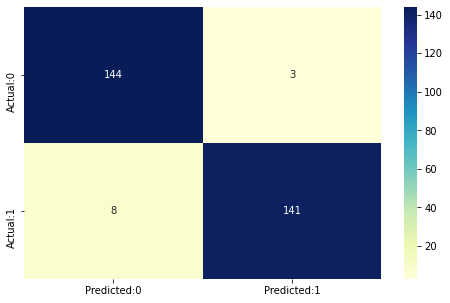

In [35]:
# Confusion Matrix for Selected Model - 3 Latargeters
cm=confusion_matrix(Y_test,Y_pred_test)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [36]:
# 3 Latargeters
print(classification_report(Y_test,Y_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       147
           1       0.98      0.95      0.96       149

    accuracy                           0.96       296
   macro avg       0.96      0.96      0.96       296
weighted avg       0.96      0.96      0.96       296

